In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import torch.optim as topti
import torch.utils.data as tdata

Based on random patterns, generate counts for training


In [199]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
import mubind as mb

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

motif = "AGGAACCTA"
x2, y2 = mb.datasets.simulate_xy(motif, n_trials=10000, seqlen=30, max_mismatches=2)
y2 = ((y2 - y2.min()) / (np.max(y2) - np.min(y2))).astype(np.float32)
# data = pd.DataFrame({'seq': x1, 'enr_approx': y1})
data = pd.DataFrame(
    {
        0: np.where(y2 == 0, 1, 0).astype(float),
        1: np.where(y2 == 1, 1, 0).astype(float),
    }
)
data.index = x2
# divide in train and test data -- copied from above, organize differently!
train_dataframe = data.copy()
data.shape[0]
train_dataframe = train_dataframe  # .sample(n=n_sample)
# create datasets and dataloaders
train_data = mb.datasets.SelexDataset(train_dataframe, single_encoding_step=False)
train_loader = tdata.DataLoader(dataset=train_data, batch_size=256, shuffle=True)
model = mb.models.Multibind('selex', n_rounds=1, kernels=[0, 12]).to(device)
optimiser = topti.Adam(model.parameters(), lr=0.01, weight_decay=0.01)
criterion = mb.tl.PoissonLoss()
l2 = mb.tl.train_network(model, train_loader, device, optimiser, criterion, num_epochs=10, log_each=1)


Using device: cuda:0
(10000, 2)


/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/mubind/tl/encoding.py:101: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, seq in seqs.iteritems():


total time: 12.855127096176147s 10
secs per epoch: 1.428 s



#activities
[[[0.9999997  0.793782  ]
  [0.9999986  0.57003665]]]

#log_etas
Parameter containing:
tensor([[ 0.6562, -0.6562]], device='cuda:0', requires_grad=True)


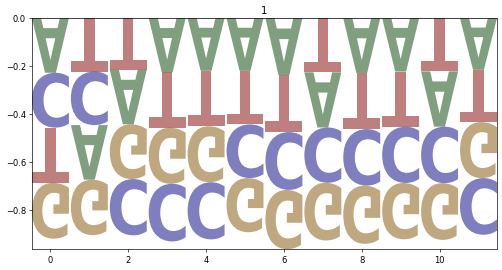

In [200]:
from matplotlib import rcParams
rcParams['figure.dpi'] = 60
mb.pl.conv_mono(model, figsize=[10, 5])

Test getters and setters to modify data in conv_mono

In [ ]:
conv_mono_df = mb.get.conv_mono_df(model)[0]
mb.set.conv_mono(model, conv_mono_df + 1, 1, device=device)
mb.pl.conv_mono(model)


In [214]:

df = train_dataframe.copy()
for c in df.columns:
    del df[c]

# declare a decoy set of counts (error otherwise)
df[0] = 1. / df.shape[0]
selex_dataset = mb.datasets.SelexDataset(df, single_encoding_step=False)
loader = tdata.DataLoader(dataset=selex_dataset, batch_size=df.shape[0], shuffle=True)


(10000, 1)


/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/mubind/tl/encoding.py:101: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, seq in seqs.iteritems():


In [215]:
df.shape

(10000, 1)

In [154]:
store_rev = loader.dataset.store_rev
with torch.no_grad():  # we don't need gradients in the testing phase
    for i, batch in enumerate(loader):
        # Get a batch and potentially send it to GPU memory.
        mononuc = batch["mononuc"].to(device)
        b = batch["batch"].to(device) if "batch" in batch else None
        countsum = batch["countsum"].to(device) if "countsum" in batch else None
        seq = batch["seq"] if "seq" in batch else None
        residues = batch["residues"].to(device) if "residues" in batch else None
        y = batch["protein_id"] if "protein_id" in batch else None
        if residues is not None and store_rev:
            mononuc_rev = batch["mononuc_rev"].to(device)
            inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum,
                      "residues": residues}
        elif residues is not None:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues}
        else:
            inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues, "protein_id": y}

        output = model(**inputs)
        output = output.cpu().detach().numpy()
        # print(output)
        y = y.cpu().detach().numpy() if y is not None else None


## Generate a bunch of random models


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


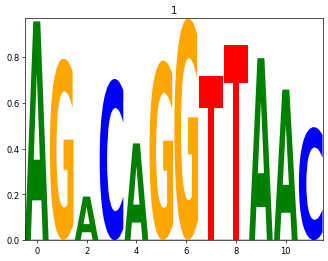


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


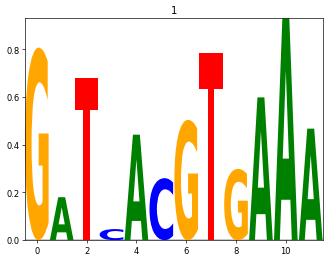


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


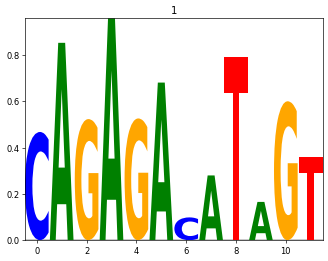


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


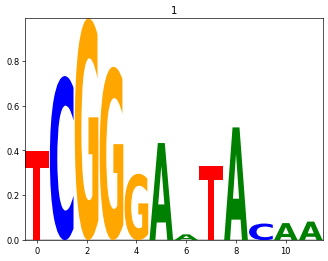


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


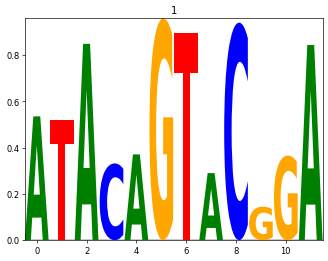


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


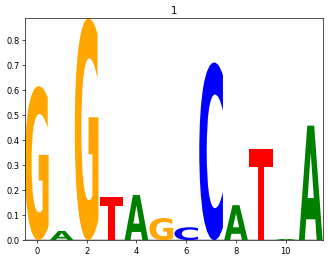


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


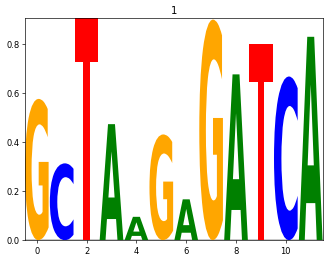


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


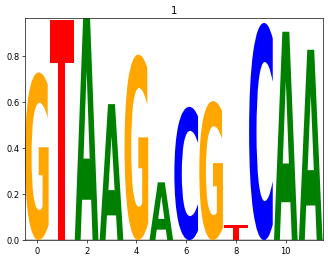


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


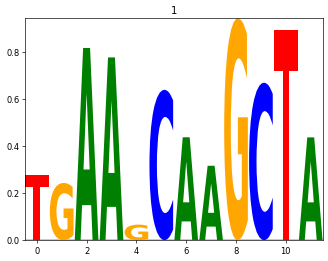


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


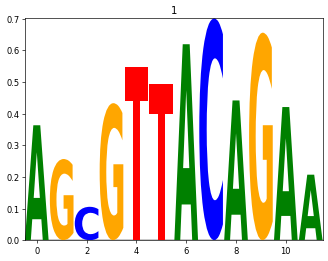


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


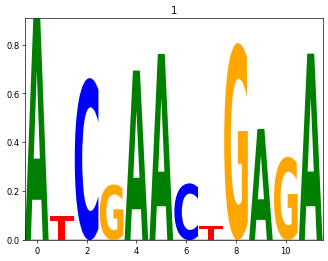


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


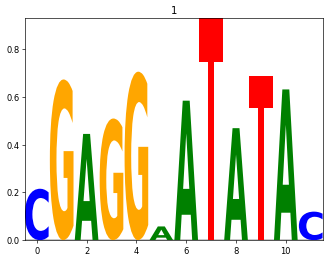


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


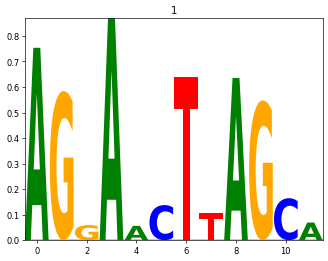


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


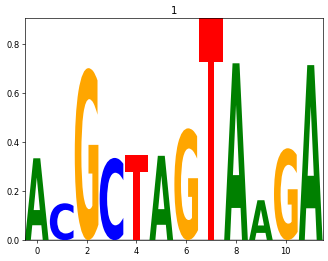


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


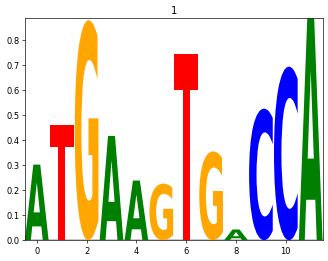


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


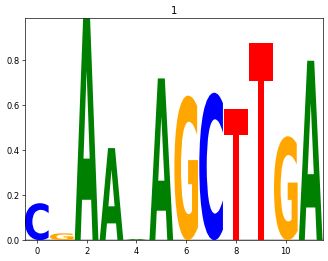


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


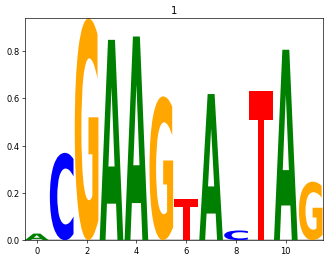


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


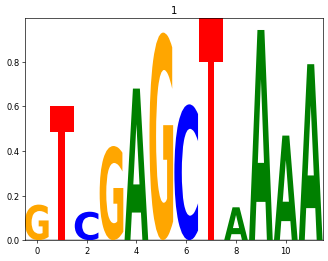


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


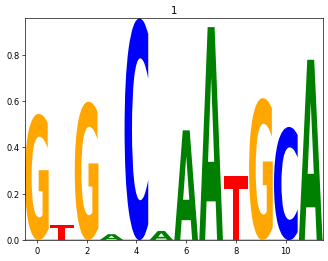


#activities
[[[1. 1.]
  [1. 1.]]]

#log_etas
Parameter containing:
tensor([[0., 0.]], device='cuda:0', requires_grad=True)


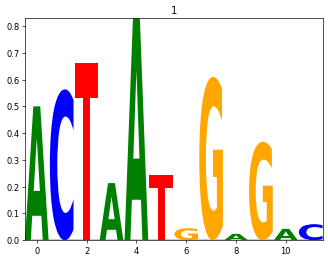

In [246]:
models = []

for i in range(20):
    motif = "AGGAACCTAGAT"
    # print(motif, len(motif))
    mod = mb.models.Multibind('selex', n_rounds=1, kernels=[0, len(motif)]).to(device)
    models.append(mod)

    conv_mono_df = mb.get.conv_mono_df(mod)[0]
    # print(conv_mono_df, conv_mono_df.shape)

    cols = np.array(conv_mono_df.columns)
    np.random.shuffle(cols)
    for c, ci in enumerate(cols):
        # print(c, ci, motif[ci])
        conv_mono_df[ci] = np.where(conv_mono_df.index == motif[c], np.random.random(), 0)
    mb.set.conv_mono(mod, conv_mono_df, 1, device=device)
    mb.pl.conv_mono(mod)

In [249]:
# score sequences with models:
outputs_by_model = []
for mod in models:
    outputs = []
    store_rev = loader.dataset.store_rev
    with torch.no_grad():  # we don't need gradients in the testing phase
        for i, batch in enumerate(loader):
            # Get a batch and potentially send it to GPU memory.
            mononuc = batch["mononuc"].to(device)
            b = batch["batch"].to(device) if "batch" in batch else None
            countsum = batch["countsum"].to(device) if "countsum" in batch else None
            seq = batch["seq"] if "seq" in batch else None
            residues = batch["residues"].to(device) if "residues" in batch else None
            y = batch["protein_id"] if "protein_id" in batch else None
            if residues is not None and store_rev:
                mononuc_rev = batch["mononuc_rev"].to(device)
                inputs = {"mono": mononuc, "mono_rev": mononuc_rev, "batch": b, "countsum": countsum,
                          "residues": residues}
            elif residues is not None:
                inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues}
            else:
                inputs = {"mono": mononuc, "batch": b, "countsum": countsum, "residues": residues, "protein_id": y}

            output = mod(**inputs)
            output = output.cpu().detach().numpy()
            # print(output)
            y = y.cpu().detach().numpy() if y is not None else None
            outputs.append(output)
    outputs_by_model.append(outputs)

In [250]:
total_reads = int(1e7)
counts_int = []
import os
for i, prob in enumerate(outputs_by_model):
    prob = prob[0]
    counts = (prob * total_reads).astype(int)
    # print(sum(counts))
    counts_int.append(counts)
    # print((prob * total_reads).astype(int))
    output_path = '../../annotations/selex/simulated/%s_counts.csv.gz' % i
    if not os.path.exists(output_path):
        out_df = pd.DataFrame(counts_int[0], index=train_dataframe.index)
        out_df.to_csv(output_path)
        torch.save(mod.state_dict(), output_path.replace('.csv.gz', '_model.pth'))
        out_df.to_csv(output_path)
